# Titanic Classification using Naive Bayes and K-Nearest Neighbors (From Scratch)
Implemented in Python using only Numpy, Pandas, and Matplotlib.

In [3]:
from google.colab import files
uploded=files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")  # Upload the Titanic train.csv file manually

Saving train.csv to train.csv


## 🔧 Data Preprocessing
We normalize continuous values and convert categorical variables to numeric.
Missing values are dropped.

In [7]:
def preprocess_data(df):
      df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].copy()
      df.dropna(inplace=True)
      df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
      df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
      df[['Age', 'Fare']] = (df[['Age', 'Fare']] - df[['Age', 'Fare']].mean()) / df[['Age', 'Fare']].std()

      x = df.drop('Survived', axis=1).values
      y = df['Survived'].values
      split_idx = int(0.8 * len(x))
      return x[:split_idx], x[split_idx:], y[:split_idx], y[split_idx:], df

x_train, x_test, y_train, y_test, preprocessed_df = preprocess_data(df)

## 📊 Data Visualization
Survival rate by gender and passenger class.

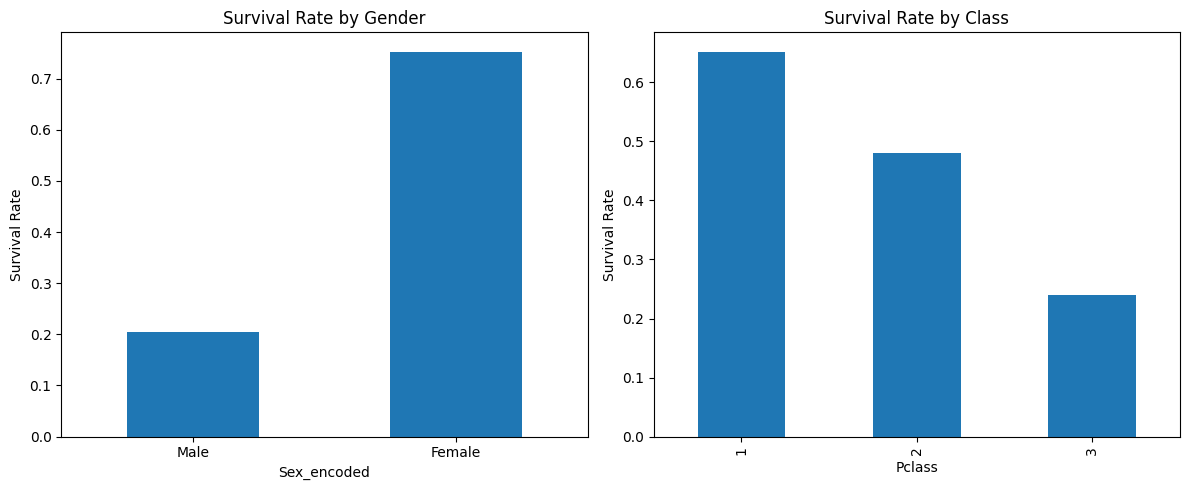

In [11]:
def visualize_data(df):
      fig, axes = plt.subplots(1, 2, figsize=(12, 5))
      df['Sex_encoded'] = df['Sex']

      df['Survived'].groupby(df['Sex_encoded']).mean().plot(kind='bar', ax=axes[0])
      axes[0].set_title("Survival Rate by Gender")
      axes[0].set_xticklabels(['Male', 'Female'], rotation=0)
      axes[0].set_ylabel("Survival Rate")

      df['Survived'].groupby(df['Pclass']).mean().plot(kind='bar', ax=axes[1])
      axes[1].set_title("Survival Rate by Class")
      axes[1].set_xlabel("Pclass")
      axes[1].set_ylabel("Survival Rate")

      plt.tight_layout()
      plt.show()

visualize_data(preprocessed_df)

## 📘 Naive Bayes Classifier (From Scratch)
Probabilistic classification using Gaussian likelihoods.

In [8]:
def naive_bayes_classifier(x_train, y_train, x_test):
    classes = np.unique(y_train)
    priors = {c: np.mean(y_train == c) for c in classes}
    means = {c: x_train[y_train == c].mean(axis=0) for c in classes}
    variances = {c: x_train[y_train == c].var(axis=0) + 1e-6 for c in classes}

    def gaussian_prob(x, mean, var):
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    y_pred = []
    for x in x_test:
        posteriors = {}
        for c in classes:
            prior = np.log(priors[c])
            conditional = np.sum(np.log(gaussian_prob(x, means[c], variances[c])))
            posteriors[c] = prior + conditional
        y_pred.append(max(posteriors, key=posteriors.get))
    return np.array(y_pred)

nb_predictions = naive_bayes_classifier(x_train, y_train, x_test)
nb_accuracy = np.mean(nb_predictions == y_test)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

Naive Bayes Accuracy: 81.12%


## 📘 K-Nearest Neighbors Classifier (From Scratch)
Classifies based on majority vote of the k-nearest points.

In [9]:
def knn_classifier(x_train, y_train, x_test, k=5):
    def euclidean_distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    y_pred = []
    for test_point in x_test:
        distances = [euclidean_distance(test_point, x) for x in x_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        majority = np.bincount(k_labels).argmax()
        y_pred.append(majority)
    return np.array(y_pred)

knn_predictions = knn_classifier(x_train, y_train, x_test, k=5)
knn_accuracy = np.mean(knn_predictions == y_test)
print(f"KNN Accuracy (k=5): {knn_accuracy * 100:.2f}%")

KNN Accuracy (k=5): 79.72%
